# Linear Regression Model with Gradient Descent


In [8]:
# Use this in LinearRegression.ipynb to access functions and variables from DataSplitting.ipynb
%run DataSplitting.ipynb

import numpy as np
import copy
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


2830    middle_age
925          young
3845    middle_age
547          young
2259    middle_age
           ...    
3444    middle_age
466     middle_age
3092    middle_age
3772    middle_age
860          young
Name: Rings, Length: 2923, dtype: category
Categories (3, object): ['young' < 'middle_age' < 'old']
[0 2 0 ... 0 0 2]
Training set: (2923, 11) (2923,)
Testing set: (627, 11) (627,)
Validation set: (627, 11) (627,)

Training set:
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2830   0.525     0.430   0.135        0.8435          0.4325          0.1800   
925    0.430     0.325   0.100        0.3645          0.1575          0.0825   
3845   0.455     0.350   0.105        0.4160          0.1625          0.0970   
547    0.205     0.155   0.045        0.0425          0.0170          0.0055   
2259   0.590     0.465   0.160        1.1005          0.5060          0.2525   

      Shell weight   Age  Sex_F  Sex_I  Sex_M  
2830        0.1815  10.5    1.0  

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Linear Regression Model Implementation
Next, we define functions for computing the gradient and performing gradient descent. These functions will be used to train our Linear Regression model.

In [9]:
### Code from assigments

# Functions for Linear Regression and Gradient Descent

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_pred = np.dot(X, w) + b
    errors = y_pred - y
    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db

def gradient_descent(X, y, X_val, y_val, w_in, b_in, alpha, num_iters):
    m = len(X)
    J_history = []
    J_val_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = np.mean((np.dot(X, w) + b - y) ** 2) / 2
        J_history.append(cost)
        val_cost = np.mean((np.dot(X_val, w) + b - y_val) ** 2) / 2
        J_val_history.append(val_cost)
    return w, b, J_history, J_val_history

def predict(X, w, b):
    return np.dot(X, w) + b

# Initialize parameters


In [10]:

initial_w = np.zeros(X_train_scaled.shape[1])
initial_b = 0

# Gradient descent settings
iterations = 1500
alpha = 0.01

X_train_array = X_train.values  # Convert DataFrame to numpy array
y_train_array = y_train.values  # Convert Series to numpy array
X_val_array = X_val.values  # Convert DataFrame to numpy array (validation data)
y_val_array = y_val.values  # Convert Series to numpy array (validation data)

# Running modified gradient descent with validation data
w, b, J_history, J_val_history = gradient_descent(X_train_scaled, y_train_array, X_val_scaled, y_val_array, initial_w, initial_b, alpha, iterations)



## Model Evaluation
After training the model, we evaluate its performance on the validation set. We use metrics such as Mean Squared Error (MSE) and R-squared (R²).


In [11]:

# Predicting on the validation set
y_val_pred = predict(X_val_scaled, w, b)

# Calculating performance metrics
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_val, r2_val

(0.004061627439278236, 0.9996043033694938)


## Visualizations
To better understand the model's performance, we visualize the cost function over iterations and compare the actual vs. predicted values.


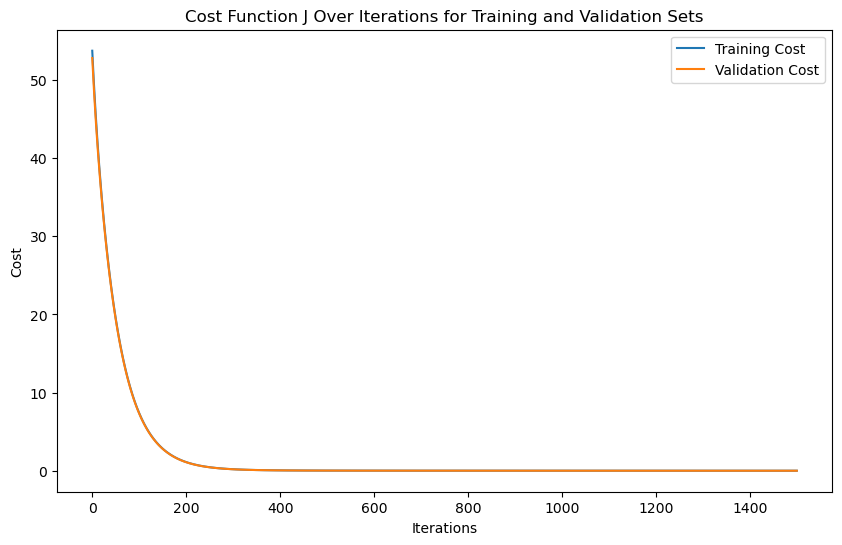

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


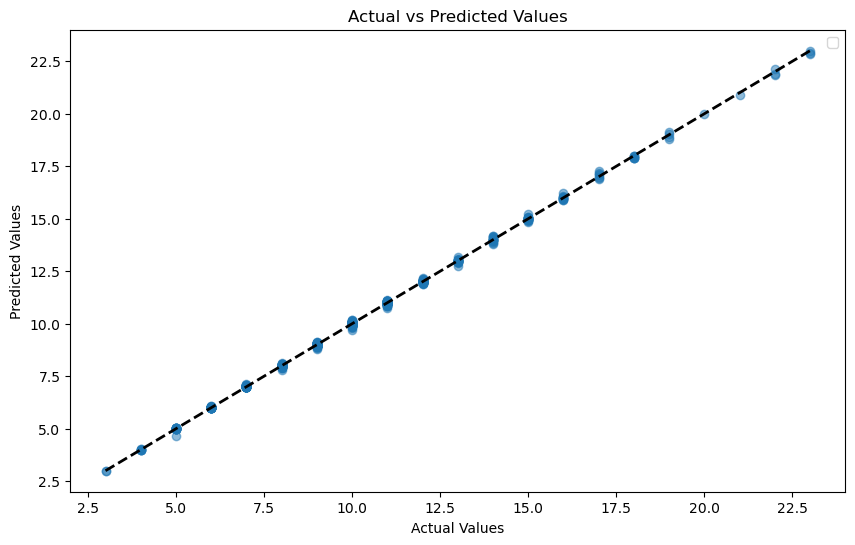

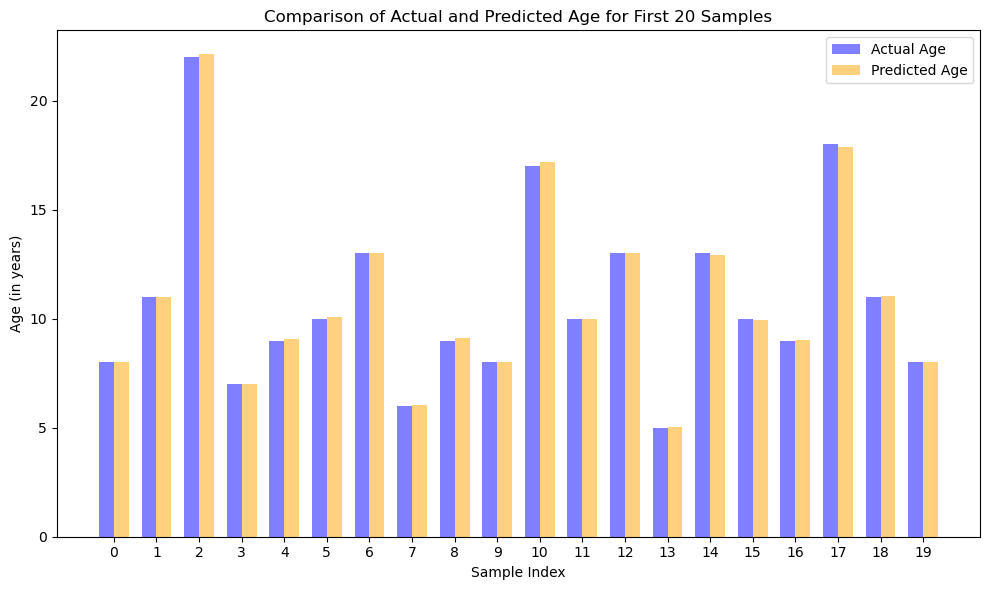

In [12]:

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(J_history, label='Training Cost')
plt.plot(J_val_history, label='Validation Cost')
plt.title('Cost Function J Over Iterations for Training and Validation Sets')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Plotting Predictions vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.legend()
plt.show()

# Plotting Predictions vs Actual values (bar plot)
# Create a DataFrame for actual vs predicted values
comparison_df = pd.DataFrame({'Actual Age': y_val, 'Predicted Age': y_val_pred})

# Selecting the first 20 samples for visualization
comparison_df = comparison_df.head(20)

# Resetting index for better plotting
comparison_df.reset_index(inplace=True, drop=True)

# Plotting the bar chart with consistent styling
plt.figure(figsize=(10, 6))  # Adjusting the figure size to match other plots
bar_width = 0.35
index = np.arange(len(comparison_df))

plt.bar(index, comparison_df['Actual Age'], bar_width, alpha=0.5, label='Actual Age', color='blue')
plt.bar(index + bar_width, comparison_df['Predicted Age'], bar_width, alpha=0.5, label='Predicted Age', color='orange')

plt.xlabel('Sample Index')
plt.ylabel('Age (in years)')
plt.title('Comparison of Actual and Predicted Age for First 20 Samples')
plt.xticks(index + bar_width / 2, comparison_df.index)
plt.legend()
plt.grid(visible=False)  # Turning off the grid for a cleaner look
plt.tight_layout()  # Adjusting the layout
plt.legend()
plt.show()

In [13]:
def predict_age_with_comparison(index):
    # Selecting the instance from the dataset
    instance = abalone_df.iloc[index]
    actual_age = instance['Rings'] + 1.5  # Actual age

    # Preparing the instance for prediction
    instance_scaled = scaler.transform([instance.drop('Rings')])
    
    # Making prediction
    predicted_age = predict(instance_scaled, w, b)[0]

    # Displaying the results
    print(f"Predicted Age: {predicted_age:.2f}")
    print(f"Actual Age: {actual_age}")

# Example usage - predict and compare for a specific instance in the dataset
predict_age_with_comparison(1234)  # Replace 100 with any valid index from the dataset


Predicted Age: 5.03
Actual Age: 6.5


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training Mean Squared Error: 0.004315089779341082
Training R-squared: 0.999588512758998


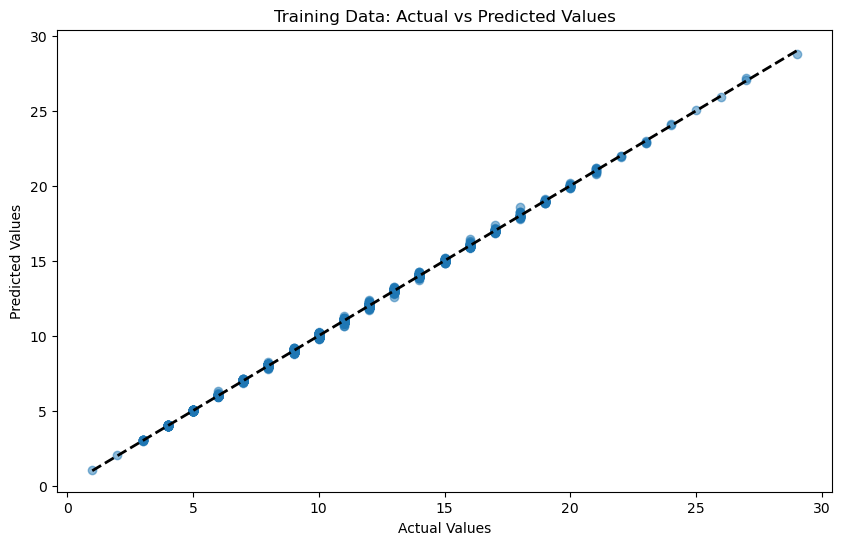

In [14]:

# Testing the model on the training dataset
y_train_pred = predict(X_train_scaled, w, b)

# Evaluating the model performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R-squared: {train_r2}")

# Plotting Predictions vs Actual values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.title('Training Data: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()
